# Data Exploration

This notebook will explore the breast cancer dataset preparing us for building a binary classification model

## Import Packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [46]:
data = pd.read_csv("../data/Breast_Cancer.csv")

In [47]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Data Shape

In [48]:
data.shape

(4024, 16)

## Data Columns

In [49]:
data.columns.to_list()

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status']

## Define Target Feature

In [50]:
target = "Status"

features = [col for col in data.columns if col != target]

## Check Unique Values

In [51]:
unique_features = []

for col in features:
    unique_count = data[col].nunique()
    unique_features.append(col)
    print(f"{col}: {unique_count} unique values")

Age: 40 unique values
Race: 3 unique values
Marital Status: 5 unique values
T Stage : 4 unique values
N Stage: 3 unique values
6th Stage: 5 unique values
differentiate: 4 unique values
Grade: 4 unique values
A Stage: 2 unique values
Tumor Size: 110 unique values
Estrogen Status: 2 unique values
Progesterone Status: 2 unique values
Regional Node Examined: 54 unique values
Reginol Node Positive: 38 unique values
Survival Months: 107 unique values


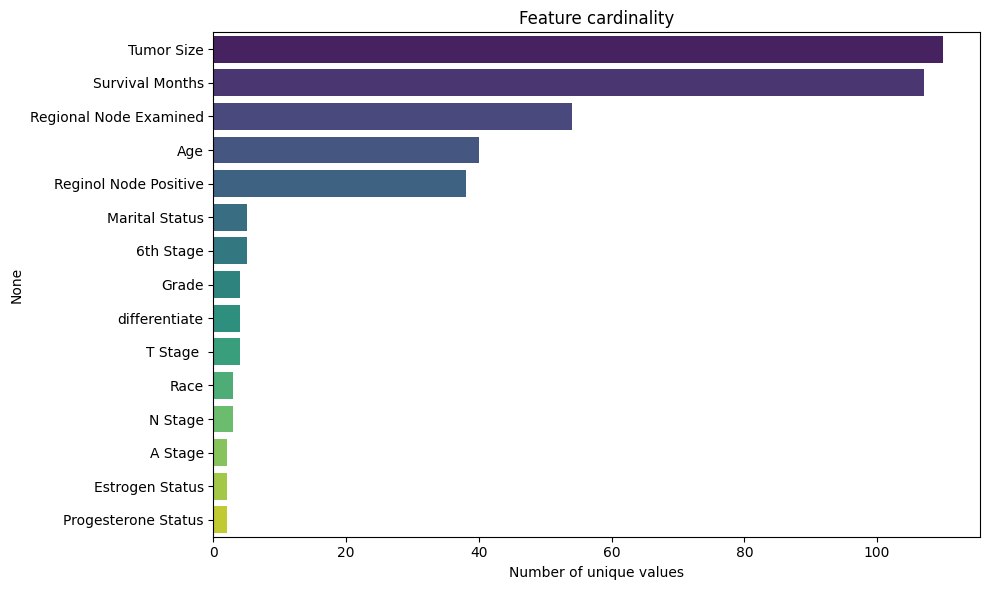

In [52]:
# Create a series of unique counts and plot it
counts = {col: data[col].nunique() for col in features}
counts_series = pd.Series(counts).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts_series.values, y=counts_series.index,
            hue=counts_series.index, dodge=False, legend=False,
            palette="viridis")
plt.xlabel("Number of unique values")
plt.title("Feature cardinality")
plt.tight_layout()

**Conclusion:**

For Catergorical features with a low unique value we can use one hot encoding.

For catergorical features with a high cardinality we can use mean response encoding.

## Target Investigation

In [53]:
data[target].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

We would like to change this to a binary 0 and 1 value

In [54]:
# convert target to binary in-place
data['Status'] = data['Status'].map({'Alive': 1, 'Dead': 0})

# confirm transformation
print(data['Status'].value_counts())

Status
1    3408
0     616
Name: count, dtype: int64


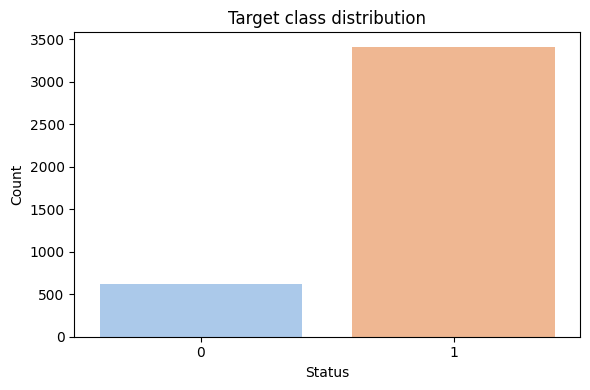

In [55]:
status_counts = data[target].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values,
            hue=status_counts.index, dodge=False, legend=False,
            palette="pastel")
plt.ylabel("Count")
plt.title("Target class distribution")
plt.tight_layout()


### Survival Time by Status

Compare the distribution of `Survival Months` for each target class to see if survivors tend to have longer follow‑up times.

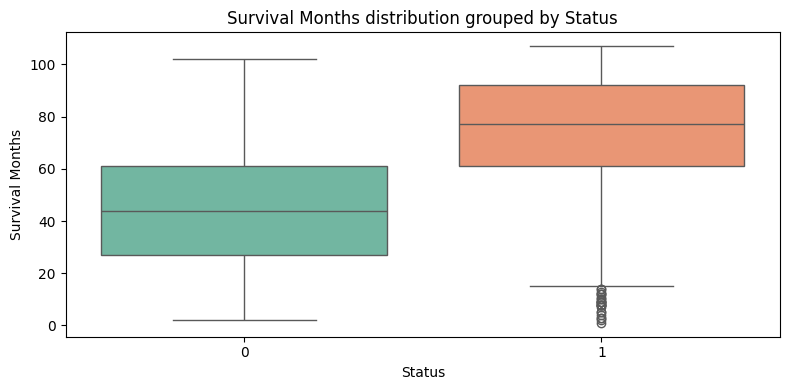

In [56]:
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y="Survival Months", data=data,
            hue=data[target], palette="Set2", legend=False)
plt.title("Survival Months distribution grouped by Status")
plt.tight_layout()

## Investigate data types